In [105]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## Foucs of the project is to understant non-linear parameter.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

![](iris.jpg)

In [106]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [107]:
# rename column
df.columns=['sepal length','sepal width','petal length','petal width']
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
#form target column in the dataframe using iris.target 
df['target'] = iris.target
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [109]:
#each target name is mapped to target value (i.e. 0 , 1, 2)

#target name : setosa --> 0, versicolor --> 1, virginica -->2 

df['name'] = [iris.target_names[target] for target in df.target]
df.head()

,sepal length,sepal width,petal length,petal width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


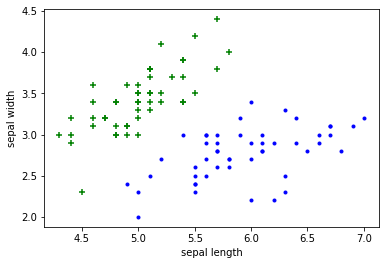

In [110]:
#form three dataframe for each type of flower
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

#plot between df0 and df1           --> sepal length and sepal width

#plot scatter plot for data of df0 between sepal length and sepal width
#plot scatter plot for data of df1 between sepal length and sepal width

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.scatter(df0['sepal length'],df0['sepal width'], color='green',marker='+')
plt.scatter(df1['sepal length'],df1['sepal width'], color='blue',marker='.')


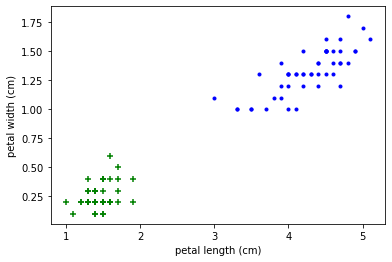

In [111]:
#plot between df0 and df1     --> petal length and petal width

#plot scatter plot for data of df0 between petal length and petal width
#plot scatter plot for data of df1 between petal length and petal width


plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length'],df0['petal width'], color='green',marker='+')
plt.scatter(df1['petal length'],df1['petal width'], color='blue',marker='.')

In [112]:
#form X vector by dropping 'target' and 'flower_name'
#form y vector which is target

X = df.drop(['target','name'], axis='columns')
y = df['target']

X_train,X_test, y_train,y_test =  train_test_split(X, y, test_size=0.3)

In [113]:
#import support vector classifier   

#kernel='rbf'  --> default
from sklearn.svm import SVC

In [114]:
#create model
#C --> regularization parameter, gamma = 'scale'
#increasing C is decreasing score

model = SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9555555555555556

In [115]:
#change regularization C=10 and gamma = 10, see the effect
model = SVC(C=10, gamma=10)

model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9333333333333333

## in 2-D data may not be seprable linearly.
## we convert 2-D data to 3-D data.
## then apply kernel=linear

In [116]:
#change kernel, by default kernel is 'rbf'
model = SVC(C=10, gamma='scale', kernel='linear')

model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9555555555555556